In [67]:
!pip install pydot graphviz


In [68]:
#!/usr/bin/env pyhton3
# -*- coding 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from utils.helper import fn_plot_tf_hist
from sklearn.preprocessing import StandardScaler

In [69]:
import warnings
warnings.filterwarnings('ignore')

## Introduction to tensorFlow fifa dataset
- multi class
- reLU
- swish


In [75]:
# Global variables
inpDir = '../input' # Input Stored here
outDir = '../ouput' # output Here
modelDir = '../models'# to save Models
subDir = 'fifa_2019' # sub dir by dataset
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
#rng = np.random.default_rng(seed = RANDOM_STATE)
#N_SAMPLE = 1000
TEST_SIZE = 3811 # 18147 - 56*256
ALPHA = 0.001 # learning rate
NOISE = 0.2 # Error
EPOCHS = 100
BATCH_SIZE = 256

In [72]:
# inpDir = './input'
# outDir = './output'

In [77]:
#set the plotting parameters
params = {
    'legend.fontsize': 'medium',
    'figure.figsize':(15,4),
    'axes.labelsize':'medium',
    'axes.titlesize':'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize':'medium',
    #'text.usetex':True,
}
plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')


## Load Data
FIFA DATASET

## EDA
1. Remove Null From Position
2. Read Unique Values from the columns

In [78]:
data_df = pd.read_csv(os.path.join(inpDir,'fifa_2019.csv'),index_col=1)

In [80]:
data_df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [82]:
data_df.dropna(subset= ('Position'), inplace = True)


In [83]:
for col in data_df.columns:
    unq = data_df[col].unique()
    print(f'{col}, #:{len(unq)}, Values:{unq}')

Unnamed: 0, #:18147, Values:[    0     1     2 ... 18204 18205 18206]
Name, #:17140, Values:['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']
Age, #:29, Values:[31 33 26 27 32 25 29 28 24 30 19 40 22 23 34 35 36 37 21 18 20 39 41 17
 38 45 42 16 44]
Photo, #:18147, Values:['https://cdn.sofifa.org/players/4/19/158023.png'
 'https://cdn.sofifa.org/players/4/19/20801.png'
 'https://cdn.sofifa.org/players/4/19/190871.png' ...
 'https://cdn.sofifa.org/players/4/19/241638.png'
 'https://cdn.sofifa.org/players/4/19/246268.png'
 'https://cdn.sofifa.org/players/4/19/246269.png']
Nationality, #:164, Values:['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Monten

In [84]:
data_df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle'

In [85]:
data_df

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,18202,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
243165,18203,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
241638,18204,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K


In [86]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18147 entries, 158023 to 246269
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18147 non-null  int64  
 1   Name                      18147 non-null  object 
 2   Age                       18147 non-null  int64  
 3   Photo                     18147 non-null  object 
 4   Nationality               18147 non-null  object 
 5   Flag                      18147 non-null  object 
 6   Overall                   18147 non-null  int64  
 7   Potential                 18147 non-null  int64  
 8   Club                      17918 non-null  object 
 9   Club Logo                 18147 non-null  object 
 10  Value                     18147 non-null  object 
 11  Wage                      18147 non-null  object 
 12  Special                   18147 non-null  int64  
 13  Preferred Foot            18147 non-null  object 
 14  Inter

In [87]:
data_df.isnull().sum()

Unnamed: 0           0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1504
Length: 88, dtype: int64

In [88]:
# num_cols = data_df.select_dtypes(exclude='object')

In [89]:
# num_cols.info()

In [90]:
rel_cols = ['Position', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 
            'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 
            'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 
            'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [91]:
data_df = data_df[rel_cols]
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,,,,,,,,,,,,,,,,,,,,,
158023,RF,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
20801,ST,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
190871,LW,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
193080,GK,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
192985,RCM,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [92]:
data_df.dropna(inplace=True)

In [93]:
data_df.isnull().sum().sum()

0

In [94]:
data_df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [95]:
goalkeeper = 'GK'
forward = ['ST','LW','RW','LF','RF','RS','LS','CF']
midfielder = ['RCM','LCM','LDM','CAM','CDM','RDM','RAM','CM','LAM','RM','LM']
defender = ['CB','RCB','LCB','LWB','RWB','LB','RB']

In [96]:
data_df.loc[data_df['Position'] == 'GK','Position'] = 0
data_df.loc[data_df['Position'].isin(defender),'Position'] = 1
data_df.loc[data_df['Position'].isin(midfielder),'Position'] = 2

data_df.loc[data_df['Position'].isin(forward),'Position'] = 3

In [97]:
data_df['Position'] = pd.to_numeric(data_df['Position'], downcast = 'integer')

In [98]:
data_df['Position'].unique()


array([3, 0, 2, 1], dtype=int8)

In [99]:
class_labels = {0:'Goalkeeper', 1: 'Defender', 2: 'Midfielder', 3: 'Forward'}

In [100]:
X = data_df.drop('Position',axis=1)
y = data_df['Position'].to_numpy()

## Split Data in test train

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,stratify = y, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14336, 33), (3811, 33), (14336,), (3811,))

In [102]:
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray)

In [103]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
X_train.shape

(14336, 33)

In [105]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],), name = 'input'), # input layer
    tf.keras.layers.Dense(18, activation = 'leaky_relu', name = 'fc_1'), # Hidden layer called dense in tensorflow # tf.nn.silu
    # tf.keras.layers.Dense(4, activation = 'relu',  name = 'fc_2'),# node called as unit
    # tf.keras.layers.Dense(4, activation = 'relu', name = 'fc_3'),# fully connected layer(Fc)
    # tf.keras.layers.Dense(3, activation = 'relu',  name = 'fc_4'),
    tf.keras.layers.Dense(4, name = 'output')
    
])

In [106]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc_1 (Dense)                    │ (None, 18)             │           612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 4)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688 (2.69 KB)

 Trainable params: 688 (2.69 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) # y_test, y_pred shape should be equal

In [135]:
tf.keras.utils.plot_model(
    model, 
    os.path.join(outDir, 'multilayer_fifa.png'),
    show_shapes=True, 
    show_dtype=True, 
    show_layer_activations=True
)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [108]:
prediction = model(X_train[:1]).numpy()
prediction.sum()

-2.0469785

In [109]:
tf.nn.softmax(prediction).numpy().sum()

1.0

In [ ]:
model.compile(optimizer = 'adam', # optimisation, loss calculation 
    loss = loss_fn,
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(x = X_train, y = y_train, 
    validation_data = [X_test, y_test],
    batch_size = BATCH_SIZE,
    verbose = 0,
    epochs =EPOCHS
)

,accuracy,loss,val_accuracy,val_loss
0,0.530552,1.125947,0.692732,0.784755
1,0.744629,0.669742,0.790869,0.569192
2,0.805246,0.515342,0.813697,0.467889
3,0.824149,0.440865,0.826817,0.419520
4,0.835728,0.402424,0.834951,0.391716


<Axes: >

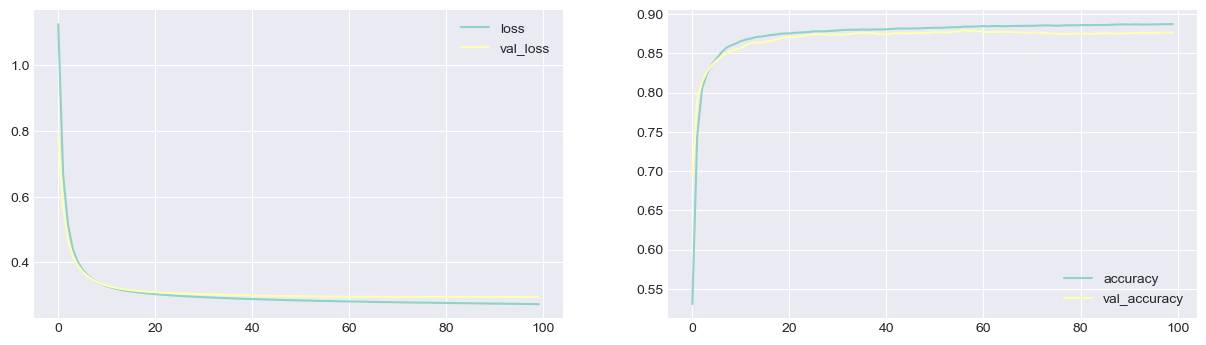

In [112]:
hist_df = pd.DataFrame(history.history) #Dictionary
display(hist_df.head())
fig, axes = plt.subplots(1,2)
hist_df.plot(y=['loss', 'val_loss'], ax= axes[0])
hist_df.plot(y=['accuracy', 'val_accuracy'], ax = axes[1])

In [113]:
pd.DataFrame(history.history)


,accuracy,loss,val_accuracy,val_loss
0,0.530552,1.125947,0.692732,0.784755
1,0.744629,0.669742,0.790869,0.569192
2,0.805246,0.515342,0.813697,0.467889
3,0.824149,0.440865,0.826817,0.419520
4,0.835728,0.402424,0.834951,0.391716
...,...,...,...,...
95,0.887067,0.273878,0.875886,0.295206
96,0.887137,0.273698,0.876673,0.295206
97,0.887347,0.273501,0.876673,0.295215
98,0.887347,0.273312,0.876673,0.295219


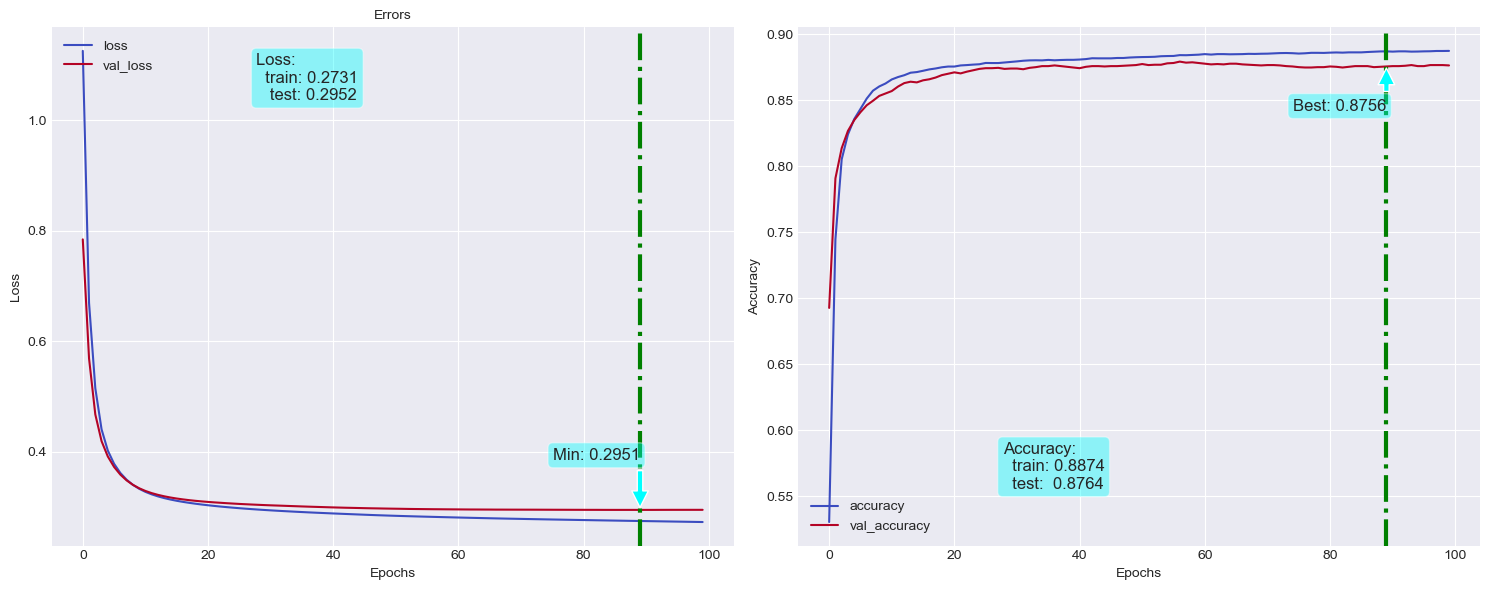

In [114]:
fn_plot_tf_hist(hist_df = hist_df)

In [115]:
y_pred = model.predict(X_train)
accuracy_score(y_true= y_train, y_pred = y_pred.argmax(axis=1))

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.8882533482142857

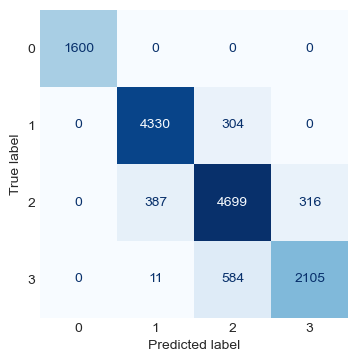

In [116]:
cm = confusion_matrix(y_true=y_train, y_pred= y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

In [117]:
y_pred = model.predict(X_test)
accuracy_score(y_true= y_test, y_pred = y_pred.argmax(axis=1))

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.8764103909734978

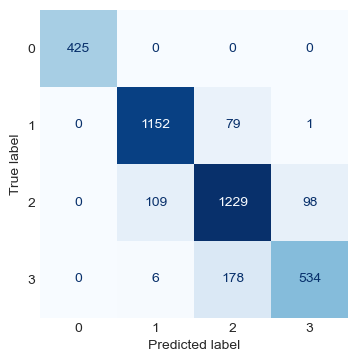

In [118]:
cm = confusion_matrix(y_true=y_test, y_pred= y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)